In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from astropy.time import Time

In [34]:
plt.style.use('ggplot')

In [35]:
%matplotlib inline

In [3]:
df = pd.read_csv('light_curves_181646914411688960_200261994165010176.csv')

In [27]:
df['time'] = df['time'].astype(np.float32)

In [28]:
df.head()

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
0,181646914411688960,17390384531924047,G,1711.339722,15.674099,10132.264128,64.670419,156.67540,False,True,4101,369295549951641967
1,181646914411688960,19240383064740421,G,1744.799194,15.713665,9769.679686,18.609422,524.98566,False,False,1,369295549951641967
2,181646914411688960,19250123867579313,G,1744.975342,15.703185,9864.433111,14.214431,693.97314,False,False,1,369295549951641967
3,181646914411688960,26786862375244063,G,1881.271729,15.706703,9832.526462,31.084255,316.31854,False,False,4097,369295549951641967
4,181646914411688960,28490402782028622,G,1912.076416,15.698724,9905.046149,13.649018,725.69660,False,False,1,369295549951641967


In [5]:
df.groupby(['source_id', 'band', 'time'])['flux_over_error'].first()

source_id           band  time       
181646914411688960  BP    1711.340066     50.274986
                          1744.799509     62.459710
                          1744.975681     61.596233
                          1931.827936     42.533165
                          2102.516479     62.515285
                                            ...    
200261994165010176  RP    2304.878083    507.798000
                          2305.054227    362.842530
                          2305.128230    492.554720
                          2305.304376    361.620670
                          2305.378379    463.599800
Name: flux_over_error, Length: 86458, dtype: float64

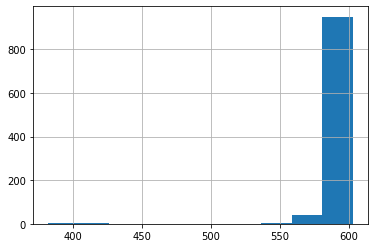

In [6]:
df.groupby('source_id')['time'].apply(lambda x: x.max() - x.min()).hist()

Max diff follows poisson distribution

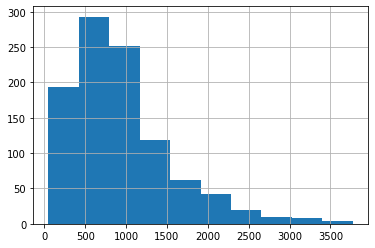

In [7]:
df.groupby('source_id')['flux_over_error'].apply(lambda x: x.max() - x.min()).hist()

In [8]:
df['other_flags'].value_counts()

0          55450
1          16715
4097        6458
4194817     2992
4198913     1057
           ...  
2101257        1
1056768        1
69639          1
3313665        1
4198941        1
Name: other_flags, Length: 399, dtype: int64

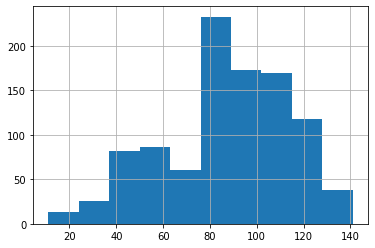

In [9]:
df['source_id'].value_counts().hist()

In [10]:
df['band'].value_counts()

G     31076
BP    27923
RP    27527
Name: band, dtype: int64

In [11]:
df['source_id'].value_counts().head()

184854434646126080    141
187839539996486272    140
188743269835075456    138
188733271151219584    136
187838814144889600    135
Name: source_id, dtype: int64

In [12]:
src = df.loc[df['source_id'] == 184854434646126080]

In [13]:
src.sort_values(by='time', inplace=True)

/home/glenn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
src

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
9032,184854434646126080,17380585512157341,G,1711.162418,14.791303,22846.784826,24.928159,916.50510,False,False,4194817,369295549951641967
9080,184854434646126080,17380585512157341,BP,1711.162761,15.282809,10652.015753,124.792369,85.35791,False,False,0,369295549951641967
9127,184854434646126080,17380585512157341,RP,1711.162849,14.117023,18111.689433,141.276072,128.20068,False,False,0,369295549951641967
9033,184854434646126080,19240322461372875,G,1744.798038,14.783311,23015.577922,124.460920,184.92212,False,True,36897,369295549951641967
9081,184854434646126080,19240322461372875,BP,1744.798331,15.295649,10526.780632,100.525953,104.71704,False,False,0,369295549951641967
...,...,...,...,...,...,...,...,...,...,...,...,...
9125,184854434646126080,50234160359290702,BP,2305.299255,15.280589,10673.817851,109.641271,97.35219,False,False,0,369295549951641967
9171,184854434646126080,50234160359290702,RP,2305.299342,14.116655,18117.819594,137.591944,131.67792,False,False,0,369295549951641967
9079,184854434646126080,50238252676855330,G,2305.372943,14.784592,22988.436333,27.081270,848.86847,False,False,1,369295549951641967
9126,184854434646126080,50238252676855330,BP,2305.373258,15.280304,10676.621424,114.736023,93.05379,False,False,0,369295549951641967


In [15]:
times = src['time'].values

In [16]:
times = Time(times, format='mjd')

In [25]:
# times.utc.iso

In [18]:
src['utc'] = times.utc.iso

/home/glenn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
src

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id,utc
9032,184854434646126080,17380585512157341,G,1711.162418,14.791303,22846.784826,24.928159,916.50510,False,False,4194817,369295549951641967,1863-07-25 03:53:52.929
9080,184854434646126080,17380585512157341,BP,1711.162761,15.282809,10652.015753,124.792369,85.35791,False,False,0,369295549951641967,1863-07-25 03:54:22.542
9127,184854434646126080,17380585512157341,RP,1711.162849,14.117023,18111.689433,141.276072,128.20068,False,False,0,369295549951641967,1863-07-25 03:54:30.136
9033,184854434646126080,19240322461372875,G,1744.798038,14.783311,23015.577922,124.460920,184.92212,False,True,36897,369295549951641967,1863-08-27 19:09:10.440
9081,184854434646126080,19240322461372875,BP,1744.798331,15.295649,10526.780632,100.525953,104.71704,False,False,0,369295549951641967,1863-08-27 19:09:35.837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,184854434646126080,50234160359290702,BP,2305.299255,15.280589,10673.817851,109.641271,97.35219,False,False,0,369295549951641967,1865-03-10 07:10:55.650
9171,184854434646126080,50234160359290702,RP,2305.299342,14.116655,18117.819594,137.591944,131.67792,False,False,0,369295549951641967,1865-03-10 07:11:03.129
9079,184854434646126080,50238252676855330,G,2305.372943,14.784592,22988.436333,27.081270,848.86847,False,False,1,369295549951641967,1865-03-10 08:57:02.256
9126,184854434646126080,50238252676855330,BP,2305.373258,15.280304,10676.621424,114.736023,93.05379,False,False,0,369295549951641967,1865-03-10 08:57:29.459


In [31]:
plot_data = src[src['band'].isin(['BP','RP'])]

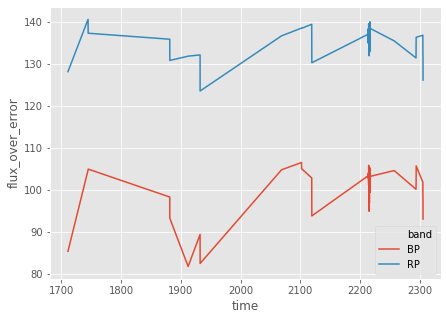

In [38]:
plt.figure(figsize=(7,5))
sns.lineplot(x='time', y='flux_over_error', hue='band', data=plot_data)